In [92]:
############################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
################################
# algorithms to be used to classification of datasets

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler #Z_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
################################

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report
  
############################# 
import warnings
warnings.filterwarnings('ignore')  

# explor of dataset

In [93]:
data=pd.read_csv("D:\practical python\data.csv")
data.head().transpose() # (M = malignant, B = benign)

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [94]:
data.shape

(569, 33)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [96]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [97]:
# Check for duplicates
duplicates = data[data.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

# Display the duplicate rows
if not duplicates.empty:
    print("Duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [98]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

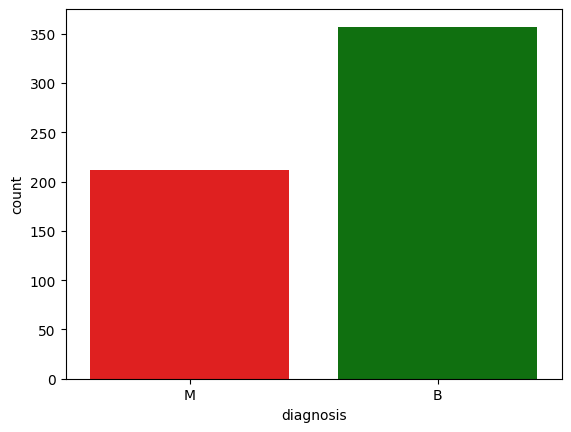

In [99]:
sns.countplot(data=data, x='diagnosis',palette=['r','g'])

# Preprocessing

In [100]:
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)

In [101]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [102]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [103]:
#data['diagnosis'].replace({"M":1,"B":0},inplace=True) #preprocessing 
s=LabelEncoder()
data['diagnosis']=s.fit_transform(data['diagnosis'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [104]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


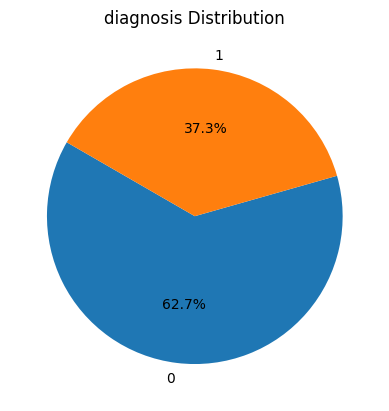

In [105]:
diagnosis_counts = data['diagnosis'].value_counts()
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=150)
plt.title('diagnosis Distribution')
plt.show()

<Axes: >

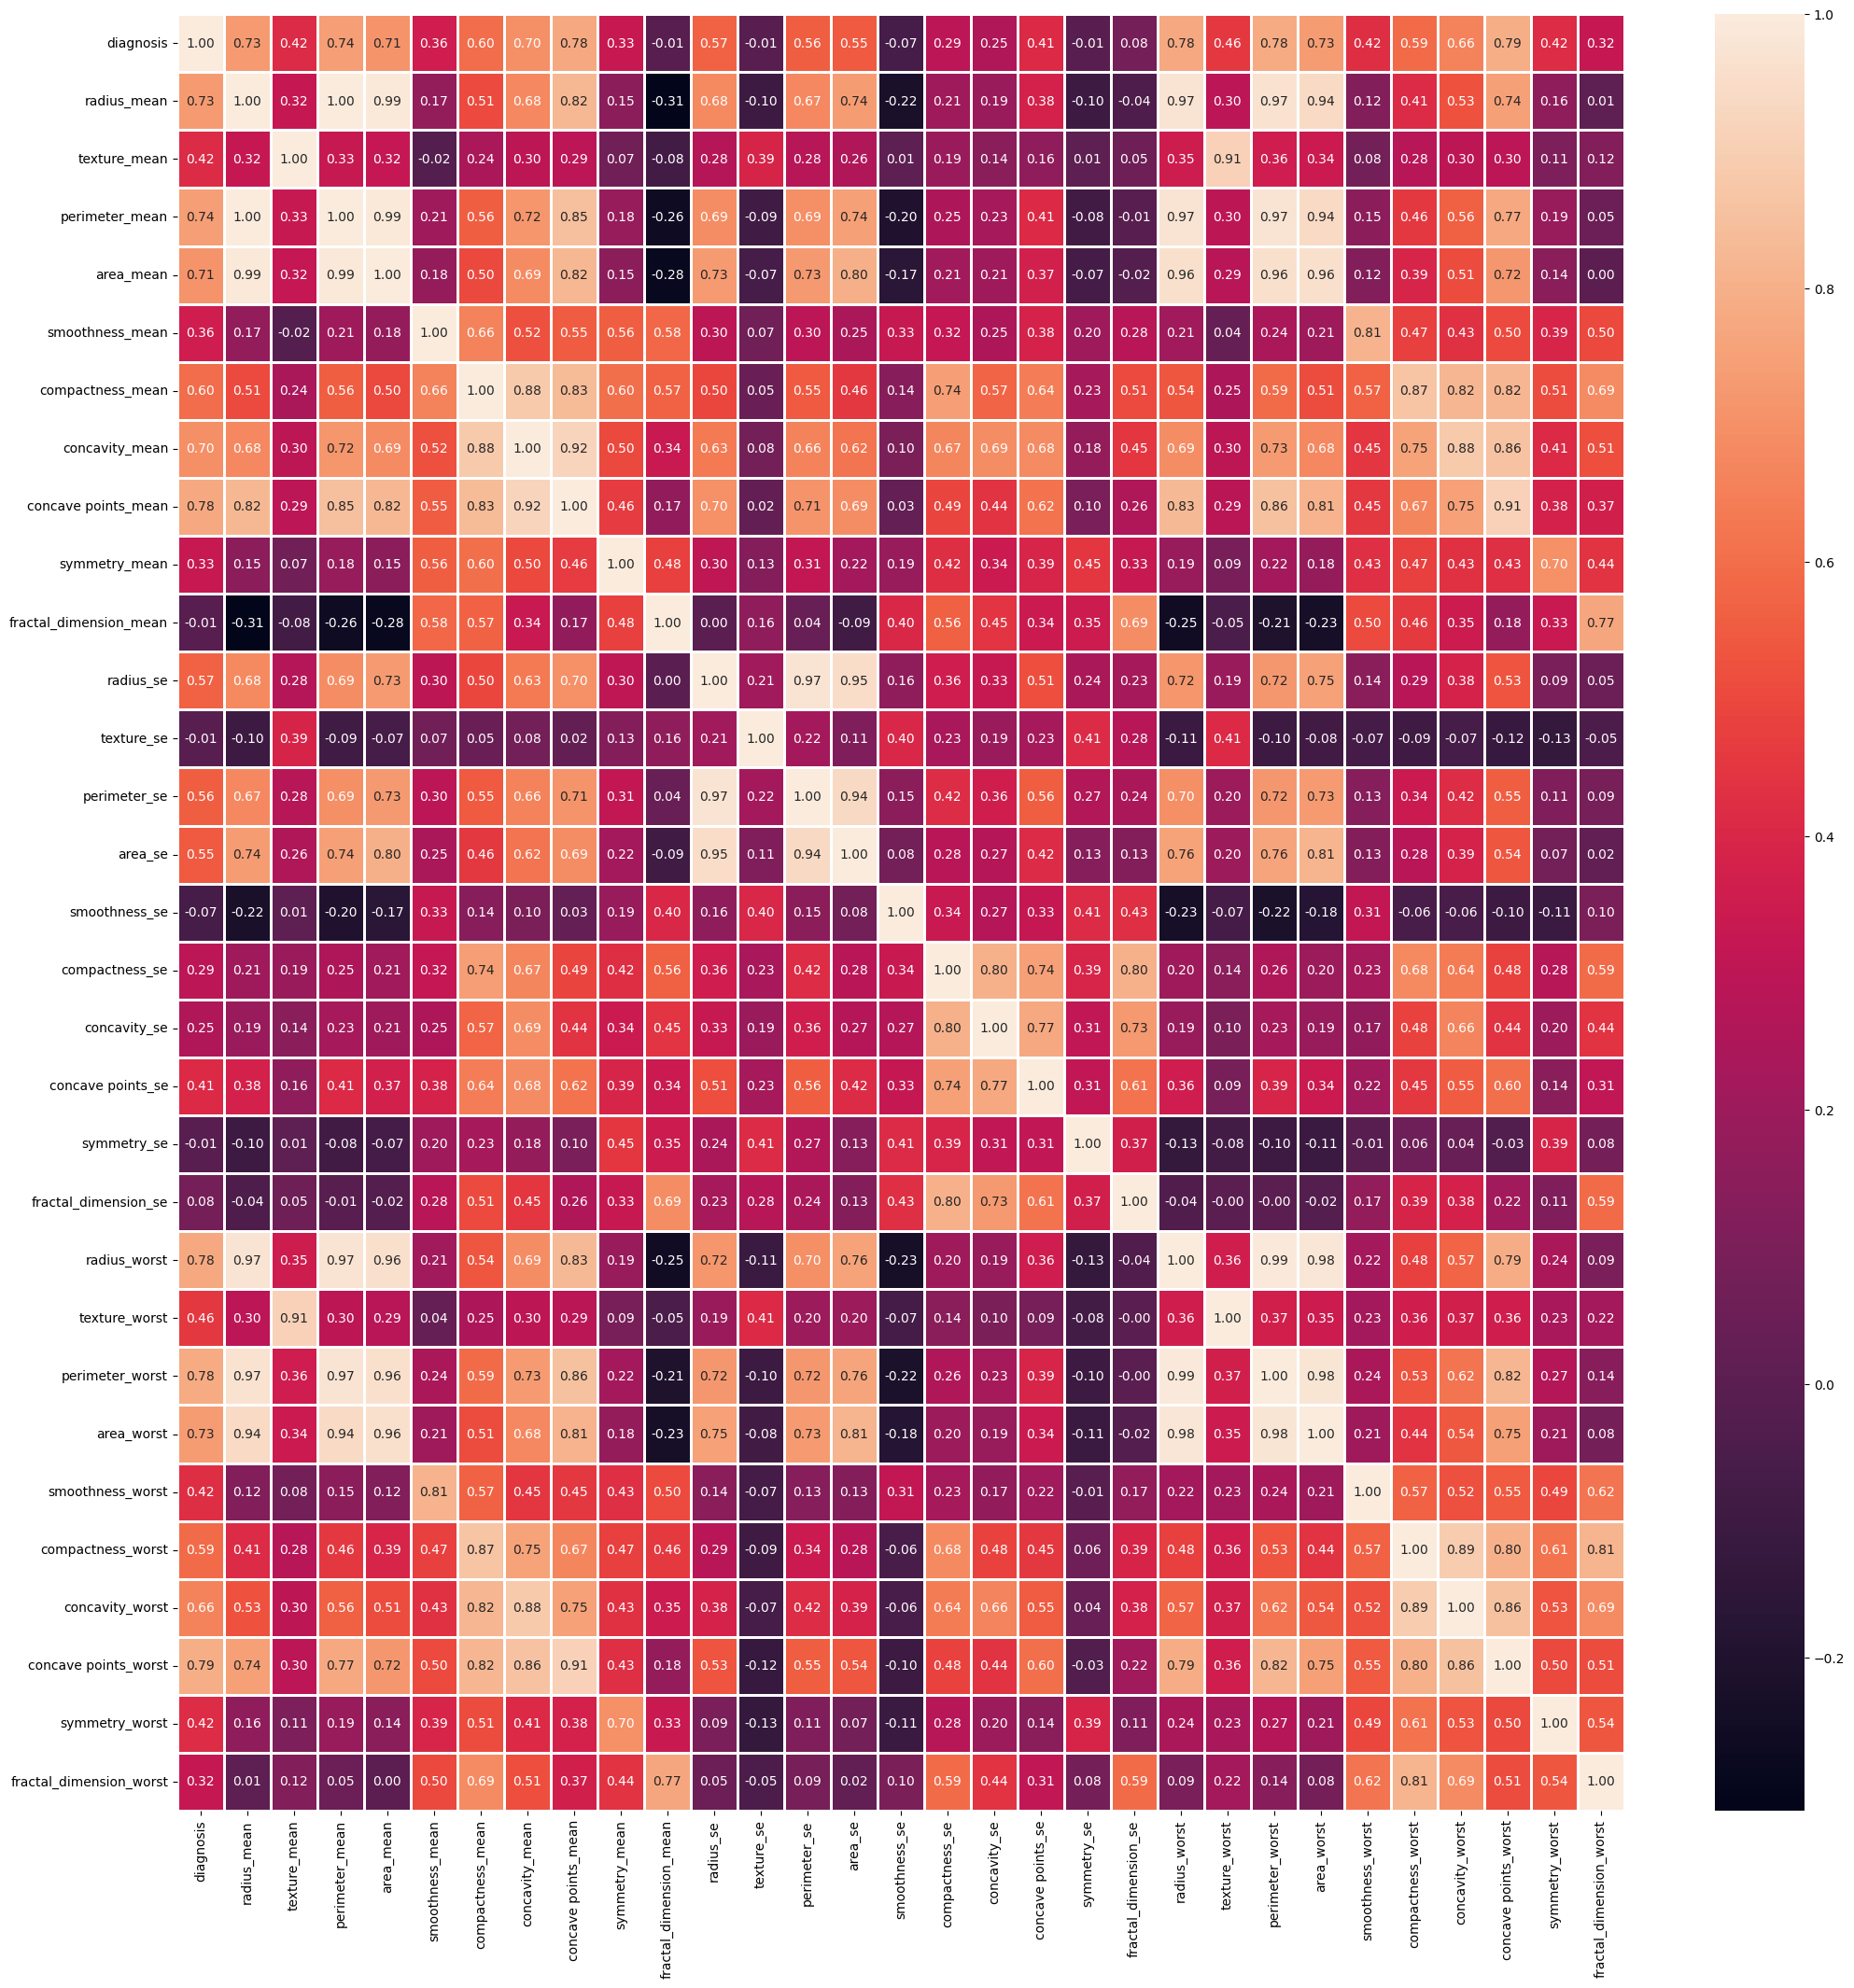

In [106]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,fmt='0.2f',linewidths=1.0)

Models_test

In [107]:
x=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)

In [109]:
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)
# to make data balance

In [110]:
model1=LogisticRegression()
model2=KNeighborsClassifier(n_neighbors=3)
model3=RandomForestClassifier(n_estimators=500,random_state=41)
model4=GradientBoostingClassifier(n_estimators=500)
model5=DecisionTreeClassifier(random_state=41)

In [111]:
columns=["LogisticRegression", "KNeighborsClassifier", "randomForestClassifier","gradientBoostingClassifier","DecisionTreeClassifier"]
result_of_accuracy=[]
result_of_reports=[]

In [112]:
def fit_and_test_model(model):
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    accuracy=accuracy_score(y_test,predict)
    result_of_accuracy.append(accuracy)
    confusion=confusion_matrix(y_test,predict)
    print(model)
    ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=['1','0']).plot()
    #sns.heatmap(confusion,annot=True,linewidths=1.0)
    print("accuracy:",accuracy)
    report_dict=classification_report(y_test,predict,output_dict=True)
    report_df = pd.DataFrame(report_dict)
    result_of_reports.append(report_df)
    print(report_df)

LogisticRegression()
accuracy: 0.986013986013986
                   0          1  accuracy   macro avg  weighted avg
precision   0.978947   1.000000  0.986014    0.989474      0.986308
recall      1.000000   0.960000  0.986014    0.980000      0.986014
f1-score    0.989362   0.979592  0.986014    0.984477      0.985946
support    93.000000  50.000000  0.986014  143.000000    143.000000


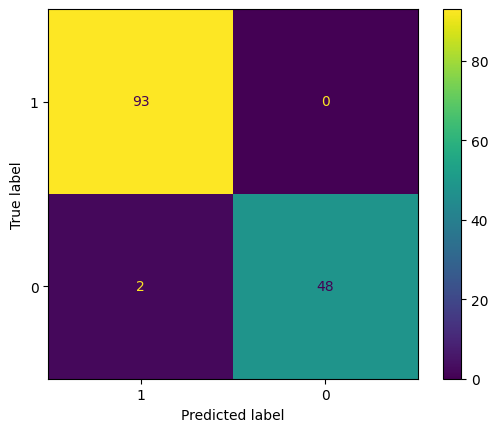

In [113]:
fit_and_test_model(model1)

KNeighborsClassifier(n_neighbors=3)
accuracy: 0.972027972027972
                   0          1  accuracy   macro avg  weighted avg
precision   0.968421   0.979167  0.972028    0.973794      0.972178
recall      0.989247   0.940000  0.972028    0.964624      0.972028
f1-score    0.978723   0.959184  0.972028    0.968954      0.971891
support    93.000000  50.000000  0.972028  143.000000    143.000000


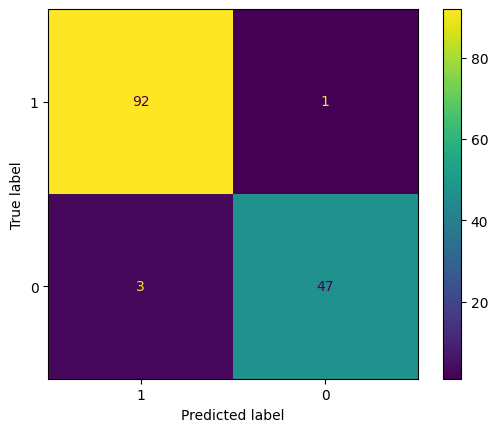

In [114]:
fit_and_test_model(model2)

RandomForestClassifier(n_estimators=500, random_state=41)
accuracy: 0.965034965034965
                   0          1  accuracy   macro avg  weighted avg
precision   0.988889   0.924528  0.965035    0.956709      0.966385
recall      0.956989   0.980000  0.965035    0.968495      0.965035
f1-score    0.972678   0.951456  0.965035    0.962067      0.965258
support    93.000000  50.000000  0.965035  143.000000    143.000000


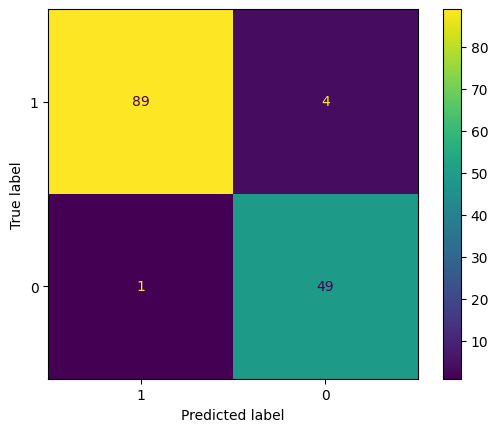

In [115]:
fit_and_test_model(model3)

GradientBoostingClassifier(n_estimators=500)
accuracy: 0.9790209790209791
                   0          1  accuracy   macro avg  weighted avg
precision   0.989130   0.960784  0.979021    0.974957      0.979219
recall      0.978495   0.980000  0.979021    0.979247      0.979021
f1-score    0.983784   0.970297  0.979021    0.977040      0.979068
support    93.000000  50.000000  0.979021  143.000000    143.000000


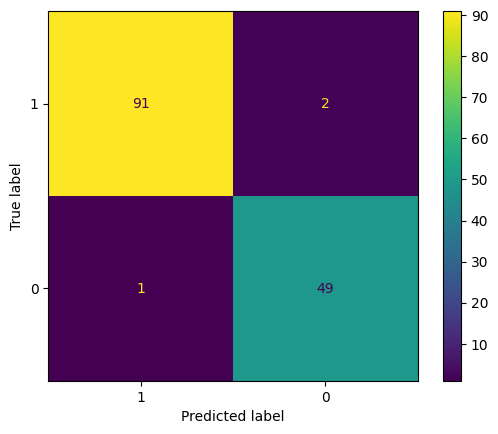

In [116]:
fit_and_test_model(model4)

DecisionTreeClassifier(random_state=41)
accuracy: 0.958041958041958
                   0      1  accuracy   macro avg  weighted avg
precision   0.967742   0.94  0.958042    0.953871      0.958042
recall      0.967742   0.94  0.958042    0.953871      0.958042
f1-score    0.967742   0.94  0.958042    0.953871      0.958042
support    93.000000  50.00  0.958042  143.000000    143.000000


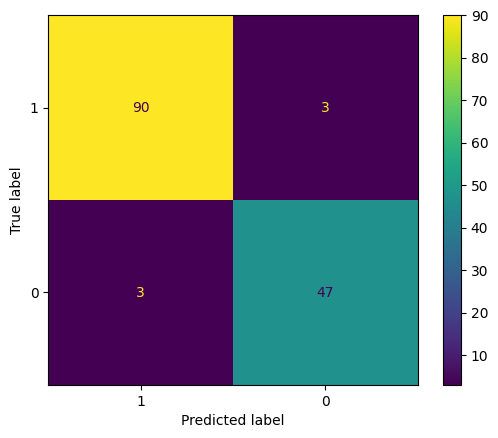

In [117]:
fit_and_test_model(model5)

In [118]:
result_table=pd.DataFrame({"Algorihm":columns,"accuracy":result_of_accuracy},index=[1,2,3,4,5]) 
result_table


,Algorihm,accuracy
1,LogisticRegression,0.986014
2,KNeighborsClassifier,0.972028
3,randomForestClassifier,0.965035
4,gradientBoostingClassifier,0.979021
5,DecisionTreeClassifier,0.958042


In [119]:
x=0
for i in result_of_reports:
    print(columns[x],"\n",i,"\n")
    x+=1

LogisticRegression 
                    0          1  accuracy   macro avg  weighted avg
precision   0.978947   1.000000  0.986014    0.989474      0.986308
recall      1.000000   0.960000  0.986014    0.980000      0.986014
f1-score    0.989362   0.979592  0.986014    0.984477      0.985946
support    93.000000  50.000000  0.986014  143.000000    143.000000 

KNeighborsClassifier 
                    0          1  accuracy   macro avg  weighted avg
precision   0.968421   0.979167  0.972028    0.973794      0.972178
recall      0.989247   0.940000  0.972028    0.964624      0.972028
f1-score    0.978723   0.959184  0.972028    0.968954      0.971891
support    93.000000  50.000000  0.972028  143.000000    143.000000 

randomForestClassifier 
                    0          1  accuracy   macro avg  weighted avg
precision   0.988889   0.924528  0.965035    0.956709      0.966385
recall      0.956989   0.980000  0.965035    0.968495      0.965035
f1-score    0.972678   0.951456  0.965035  